In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matrix
import model
import analysis as an
import plot

In [2]:
def analysis(init, patterns, end_time):
    """sparsity_analysis.
    Generate simulation data to analyze how K_ac
    sparsity affects model dynamics.

    :param init:  inital abudance vector
    :param pattern: matrix patterns to test
    :param end_time: time steps to simulate
    """
    rows, n = [], len(init)
    
    fixation_times = []
    for pattern in patterns:
        curr_mat = matrix.pattern_matrix(pattern, n)
        
        # simulate model with given params
        t, N, S, E, P = model.simulate(curr_mat, init, end_time)
        # N, S are variables by time points matrices
        
        
        # Calculate statistics
        row = {"pattern": pattern}
        
        row["initial_conditions"] = init
        
        # Compute time to fixation
        row['fixation_time'] = len(N[0])
        
        # Compute growth rate
        row["growth_rate"] = an.growth_rate(N.T)
        
        N = np.apply_along_axis(an.normalize, 1, N.T).T
        
        # Compute skewness 
        row["skewness"] = np.average(an.skewness(N.T))
        
        # Compute richness
        richnessVals = [an.richness(i) for i in N.T]
        row["richness"] = np.average(richnessVals)
        
        # Compute shannon index
        row["shannon index"] = np.average(an.shannon_index(N.T))
        
        # Add Bray Curtis distance metric array for each K_ac simulation
        brayCurtisMtx = np.identity(n)
        for i in range(n):
            for j in range(i + 1, n):
                brayCurtisMtx[i, j] = an.bray_curtis(N[i], N[j])
        row["bray curtis"] = brayCurtisMtx
        
        # store for easy conversion to a dataframe
        rows.append(row)
        
    return pd.DataFrame(rows)

In [3]:
patterns = ['null', 'ident', 'barbell', 'cycle', 'complete', 'star']

In [63]:
# Create random inits
def make_random_init(num_strains):
    max_val = 0.5
    min_val = 0
    
    init = []
    for i in range(num_strains):
        init.append(np.random.uniform(min_val, max_val))
    
    return init

In [66]:
# Generate 1000 random inits
inits = []
for i in range(1000):
    inits.append(make_random_init(4))

In [68]:
# Create dataframe containing statistics for all inits
big_df = pd.DataFrame()

for init in inits:
    res = analysis(init, patterns, 50)
    big_df = big_df.append(res)

big_df.reset_index(drop=True)

,pattern,initial_conditions,fixation_time,growth_rate,skewness,richness,shannon index,bray curtis
0,null,"[0.3486044724454162, 0.01886854944975408, 0.25...",123,-0.007727,5.075549e-01,1.0,35.627165,"[[1.0, 0.8973064778881279, 0.1608002728445347,..."
1,ident,"[0.3486044724454162, 0.01886854944975408, 0.25...",93,-0.004718,-7.232012e-02,1.0,28.820788,"[[1.0, 0.6390432699085158, 0.1159858643216557,..."
2,barbell,"[0.3486044724454162, 0.01886854944975408, 0.25...",209,-0.004143,2.432464e-01,1.0,40.408503,"[[1.0, 0.9735671289979415, 0.614197961594255, ..."
3,cycle,"[0.3486044724454162, 0.01886854944975408, 0.25...",135,-0.004054,-3.239596e-16,1.0,32.837336,"[[1.0, 0.953227656315425, 0.1608002728445348, ..."
4,complete,"[0.3486044724454162, 0.01886854944975408, 0.25...",66,-0.006309,-1.052793e+00,1.0,18.842928,"[[1.0, 0.9093860039778812, 0.1931543951404916,..."
...,...,...,...,...,...,...,...,...
5995,ident,"[0.01894858501721547, 0.2890303854152268, 0.13...",92,-0.004538,-9.281762e-02,1.0,28.031460,"[[1.0, 0.6017578640823424, 0.42188244746837134..."
5996,barbell,"[0.01894858501721547, 0.2890303854152268, 0.13...",186,-0.003673,2.107962e-01,1.0,41.125581,"[[1.0, 0.9409964212489158, 0.7165840260396097,..."
5997,cycle,"[0.01894858501721547, 0.2890303854152268, 0.13...",181,-0.003686,-6.925016e-15,1.0,40.471288,"[[1.0, 0.9548338164897253, 0.756773661355872, ..."
5998,complete,"[0.01894858501721547, 0.2890303854152268, 0.13...",67,-0.005893,-1.086227e+00,1.0,18.388542,"[[1.0, 0.8869676087960278, 0.7624279968194169,..."


In [69]:
# Create pattern dataframes
null_df = big_df.loc[big_df['pattern'] == 'null']
ident_df = big_df.loc[big_df['pattern'] == 'ident']
barbell_df = big_df.loc[big_df['pattern'] == 'barbell']
cycle_df = big_df.loc[big_df['pattern'] == 'cycle']
complete_df = big_df.loc[big_df['pattern'] == 'complete']
star_df = big_df.loc[big_df['pattern'] == 'star']

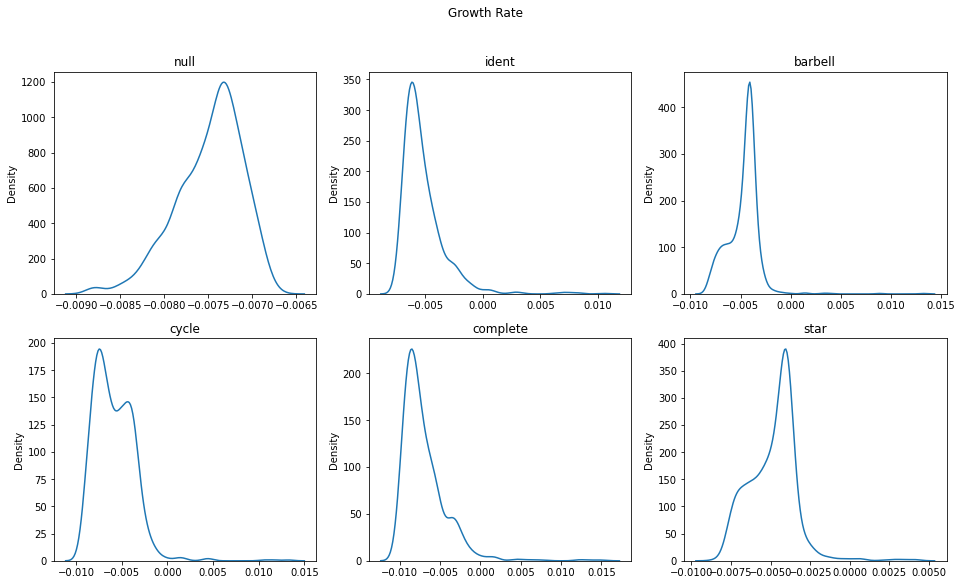

In [132]:
# growth rate plots
# x axis = metric range, y axis = frequency

all_pattern_dfs = [null_df, ident_df, barbell_df, cycle_df, complete_df, star_df]

plt.figure(figsize=(16, 9))

i=1
for pattern_df in all_pattern_dfs:
    vals = pattern_df['growth_rate'].values
    plt.subplot(2, 3, i)
    plt.title(pattern_df['pattern'].values[0])
    sns.kdeplot(vals)
    i += 1
    
plt.suptitle('Growth Rate')
plt.show()

/Users/deepikayeramosu/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


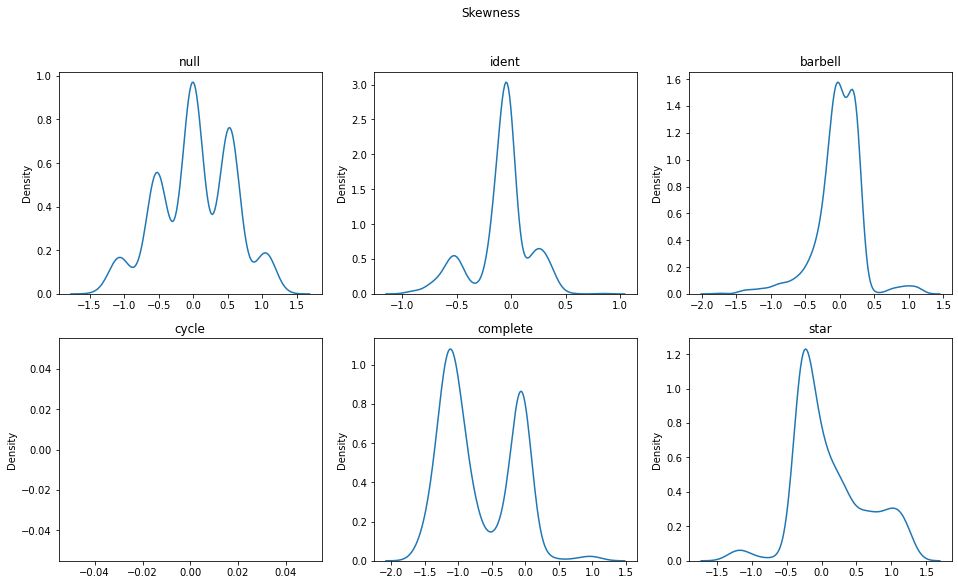

In [133]:
# skewness plots
# x axis = metric range, y axis = frequency

all_pattern_dfs = [null_df, ident_df, barbell_df, cycle_df, complete_df, star_df]

plt.figure(figsize=(16, 9))

i=1
for pattern_df in all_pattern_dfs:
    vals = pattern_df['skewness'].values
    plt.subplot(2, 3, i)
    plt.title(pattern_df['pattern'].values[0])
    sns.kdeplot(vals)
    i += 1
    
plt.suptitle('Skewness')
plt.show()

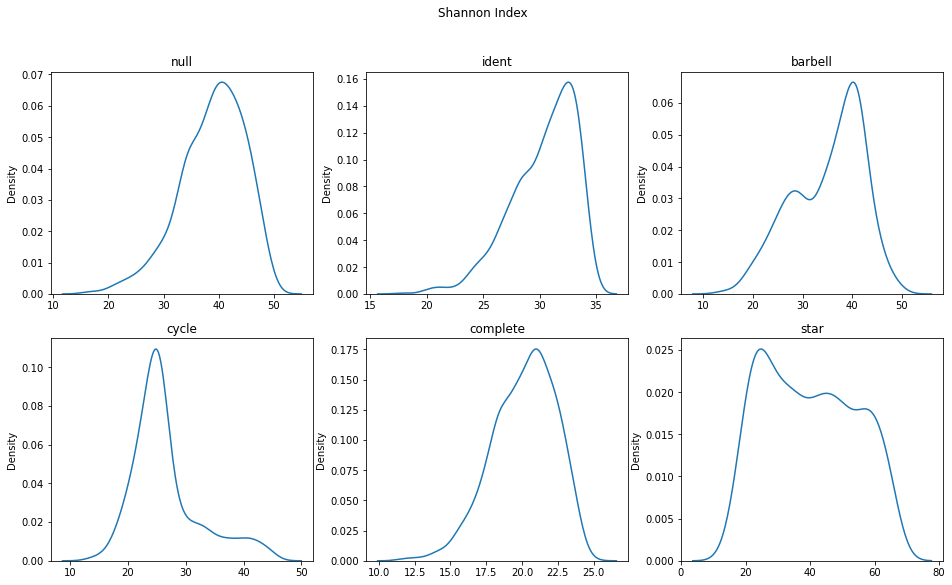

In [134]:
# shannon index plots
# x axis = metric range, y axis = frequency

all_pattern_dfs = [null_df, ident_df, barbell_df, cycle_df, complete_df, star_df]

plt.figure(figsize=(16, 9))

i=1
for pattern_df in all_pattern_dfs:
    vals = pattern_df['shannon index'].values
    plt.subplot(2, 3, i)
    plt.title(pattern_df['pattern'].values[0])
    sns.kdeplot(vals)
    i += 1
    
plt.suptitle('Shannon Index')
plt.show()

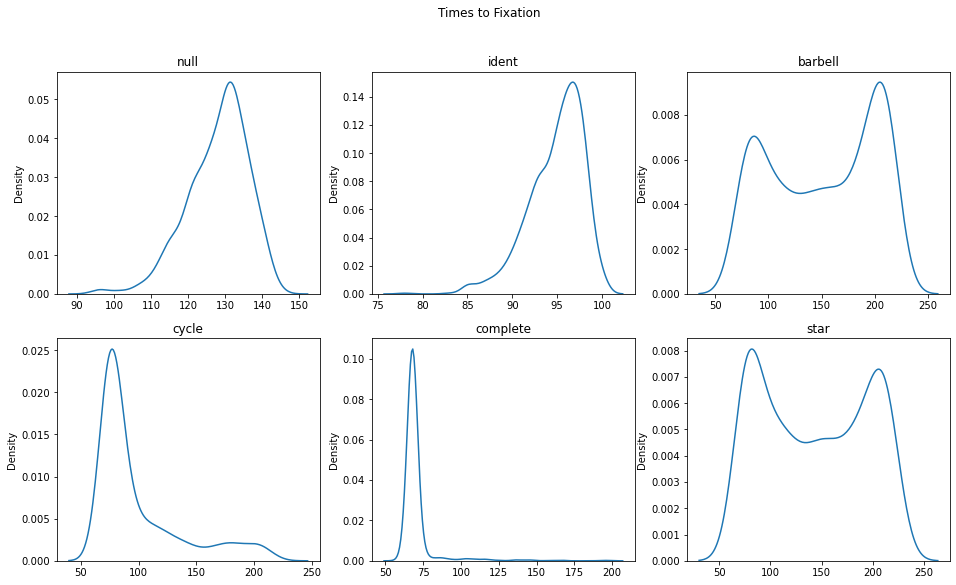

In [135]:
# fixation time plots
# x axis = metric range, y axis = frequency

all_pattern_dfs = [null_df, ident_df, barbell_df, cycle_df, complete_df, star_df]

plt.figure(figsize=(16, 9))

i=1
for pattern_df in all_pattern_dfs:
    vals = pattern_df['fixation_time'].values
    plt.subplot(2, 3, i)
    plt.title(pattern_df['pattern'].values[0])
    sns.kdeplot(vals)
    i += 1
    
plt.suptitle('Times to Fixation')
plt.show()